In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
import os

In [2]:
data_dir = "../data/pl"

In [3]:
def read_data(data_dir):
    data = []
    with open(os.path.join(data_dir, "1sarhg_reversed_1720510508.1405735.txt"), "r") as f:
        match_pattern = r'^\s*(#.*|)$'
        line = f.readline()
        while line:
            match = re.match(match_pattern, line)
            if not match:
                data.append([float(x) for x in line.split(",")])
            line = f.readline()
    return np.array(data)

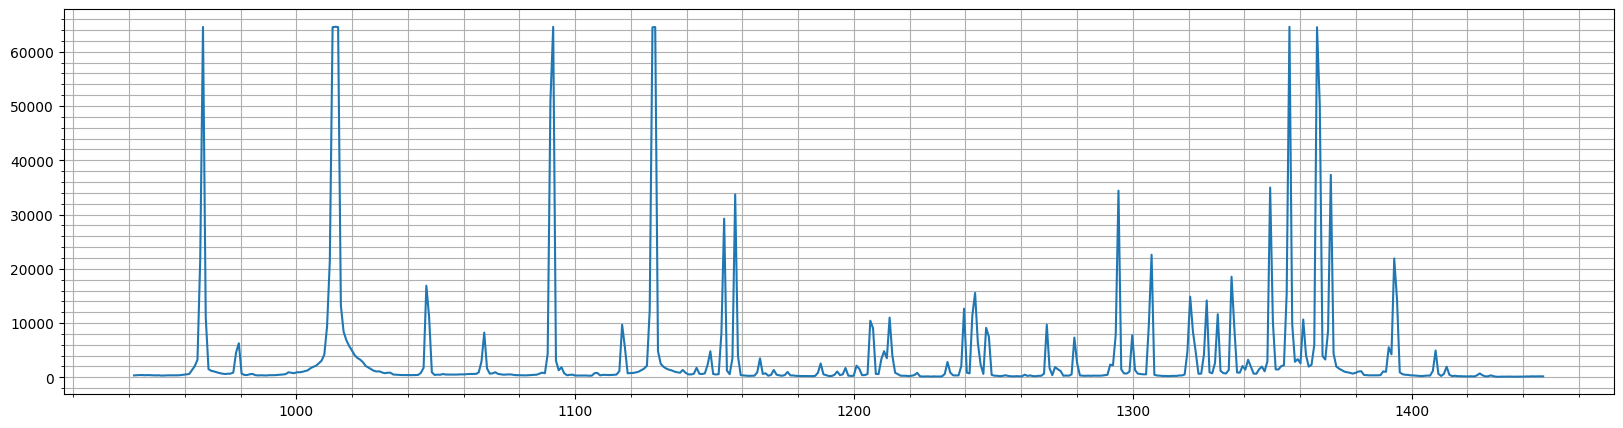

In [4]:
data = read_data(data_dir=data_dir)
x = data[:, 0]
y = data[:, 1]
plt.figure(figsize=(20, 5))
plt.plot(x, y)
plt.minorticks_on()
plt.grid(which='both')
plt.show()